In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 6.]
pd.set_option('display.max_columns', None)

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


In [13]:
battles = pd.read_csv("./battles.csv")
character_deaths = pd.read_csv("./character-deaths.csv")
character_predictions = pd.read_csv("./character-predictions.csv")

In [17]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note,num_of_attackers
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN,1
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN,1
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN,1
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN,1
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN,2


In [167]:
battles["num_of_attackers"] = 4 - battles[["attacker_1", "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis = 1)
battles["num_of_defenders"] = 4 - battles[["defender_1", "defender_2", "defender_3", "defender_4"]].isnull().sum(axis = 1)
attackers = battles.num_of_attackers.value_counts().sort_index()
attackers2 = battles["num_of_attackers"].value_counts().sort_index()

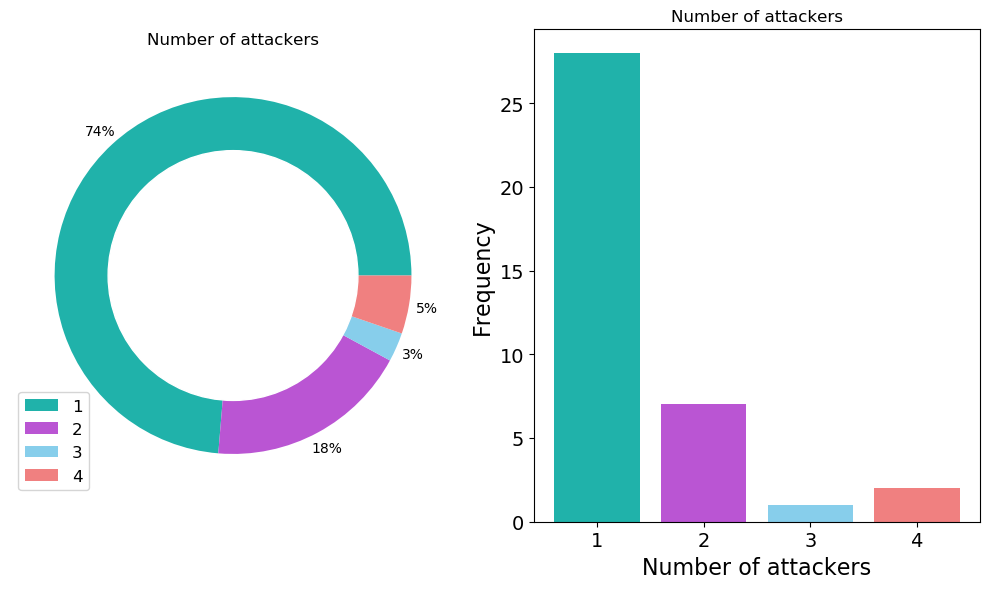

In [176]:
plt.subplot(1,2,1)
labels = [i for i in range(1,5)]
plt.pie(attackers, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.1, colors = ["lightseagreen", "mediumorchid", "skyblue", "lightcoral"] )
plt.title("Number of attackers")
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.legend(labels, loc = 3)
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(1,2,2)
plt.bar(labels, attackers, color = ["lightseagreen", "mediumorchid", "skyblue", "lightcoral"])
plt.xlabel("Number of attackers")
plt.ylabel("Frequency")
plt.title("Number of attackers")

plt.tight_layout()
plt.show()

In [178]:
attacker_kings = battles.attacker_king.value_counts()
defender_kings = battles.defender_king.value_counts()

In [140]:
kings_att = pd.DataFrame(attacker_kings)
kings_att["king"] = kings_att.index
kings_att = kings_att.set_index(i for i in range(attacker_kings.shape[0]))
kings_att = kings_att.rename(columns = {"attacker_king" : "attacks"})

kings = pd.DataFrame(defender_kings)
kings["king"] = kings.index
kings = kings.set_index(i for i in range(defender_kings.shape[0]))
kings = kings.rename(columns = {"defender_king" : "defences"})

kings = kings.join(kings_att.set_index("king"), on = "king")
where_are_NaNs = isnan(kings.attacks)
kings.attacks[where_are_NaNs] = 0
kings

,defences,king,attacks
0,14,Robb Stark,10.0
1,13,Joffrey/Tommen Baratheon,14.0
2,4,Balon/Euron Greyjoy,7.0
3,2,Stannis Baratheon,5.0
4,1,Mance Rayder,0.0
5,1,Renly Baratheon,0.0


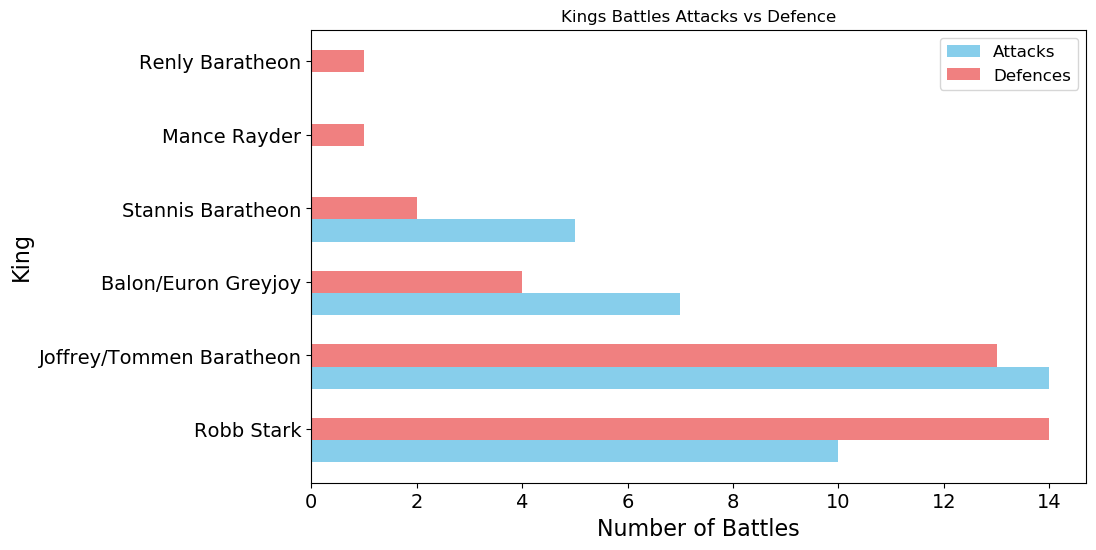

In [177]:
ind = np.arange(kings.shape[0]) #xticks
width = 0.3 #columns width      
plt.barh(ind, kings.attacks, width, label='Attacks', color = "skyblue")
plt.barh(ind + width , kings.defences.values, width, label='Defences', color = "lightcoral")

plt.ylabel("King")
plt.xlabel("Number of Battles")
plt.yticks(ind + 2 * width / 2, kings.king)
plt.legend(loc='best')
plt.title("Kings Battles Attacks vs Defence")

plt.show()

In [205]:
battles

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note,num_of_attackers,num_of_defenders
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN,1,1
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN,1,1
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN,1,1
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN,1,1
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN,2,1
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN,2,1
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN,1,1
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN,1,1
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,siege,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN,1,1
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,ambush,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...,1,1


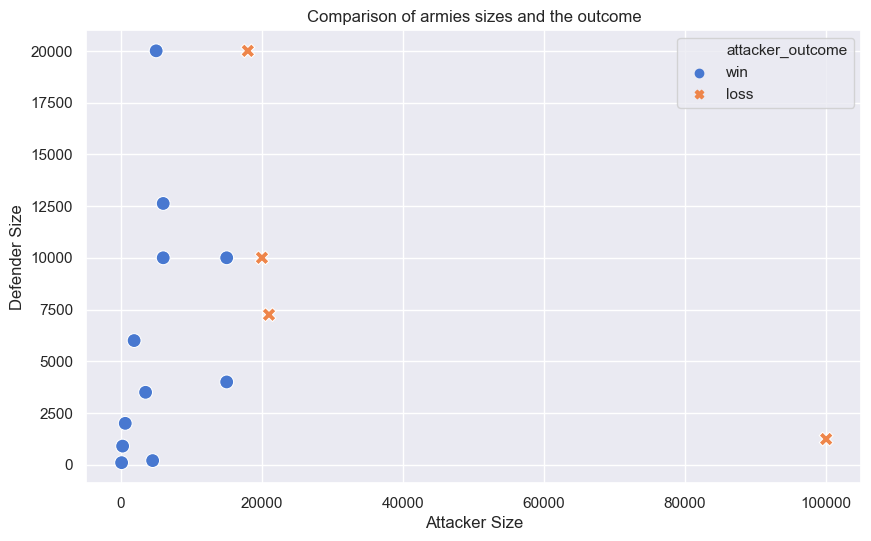

In [256]:
#ignore rows where attacker or defender size is not assigned
sns.set(palette = "muted")
ax = sns.scatterplot(data = battles, x = "attacker_size", y = "defender_size", hue = "attacker_outcome", style = "attacker_outcome", s = 100)
ax.set(xlabel = "Attacker Size", ylabel = "Defender Size", title = "Comparison of armies sizes and the outcome")
plt.show()

[Text(0, 0.5, 'Number of Battles'),
 Text(0.5, 0, 'Battle Type'),
 Text(0.5, 1.0, 'Battle type and attacker outcome')]

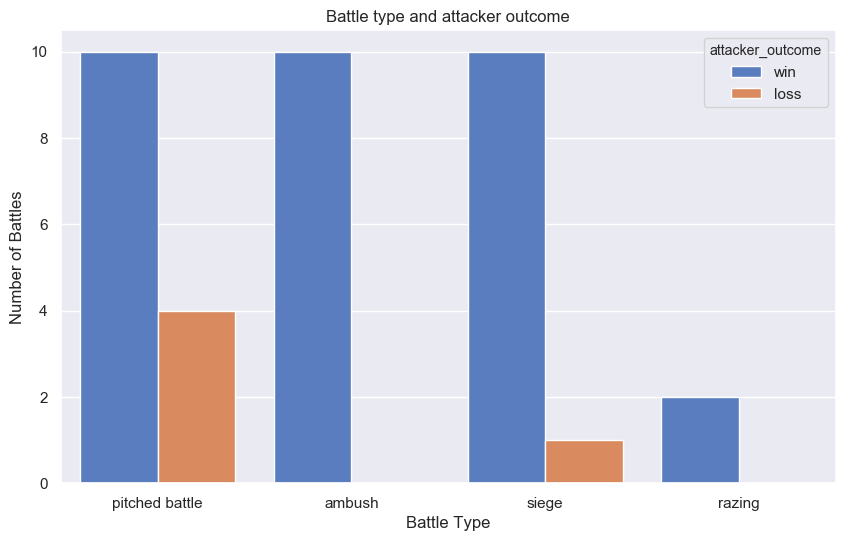

In [229]:
ax = sns.countplot(data = battles, x = "battle_type", hue = "attacker_outcome")
ax.set(xlabel = "Battle Type", ylabel = "Number of Battles", title = "Battle type and attacker outcome")

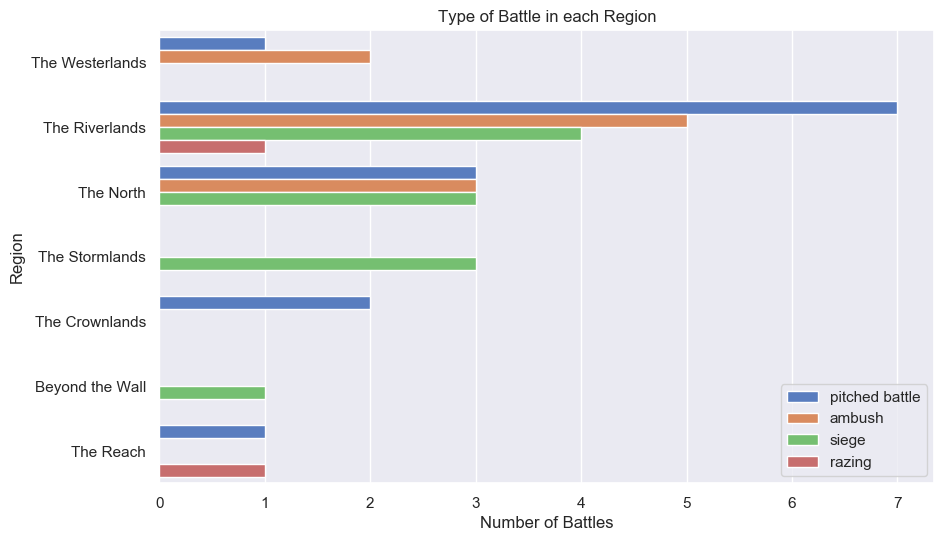

In [264]:
ax = sns.countplot(data = battles, y = "region", hue = "battle_type")
ax.set(xlabel = "Number of Battles", ylabel = "Region", title = "Type of Battle in each Region")
plt.legend(loc=4)
plt.show()

In [366]:
new_char_deaths = character_deaths.copy()

In [367]:
new_char_deaths["died"] = 1

where_are_NaNs = isnan(new_char_deaths["Death Chapter"])
new_char_deaths.died[where_are_NaNs] = 0
new_char_deaths

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,died
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0,1
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1,0
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0,1


In [375]:
for j in range(new_char_deaths.shape[0]):
    for i in new_char_deaths.Allegiances.unique():
        if i in new_char_deaths.iloc[j]["Allegiances"]:
            new_char_deaths["Allegiances"].iloc[j] = i
new_char_deaths

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,died
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0,1
2,Aegon Targaryen,Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1,0
3,Adrack Humble,Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0,1


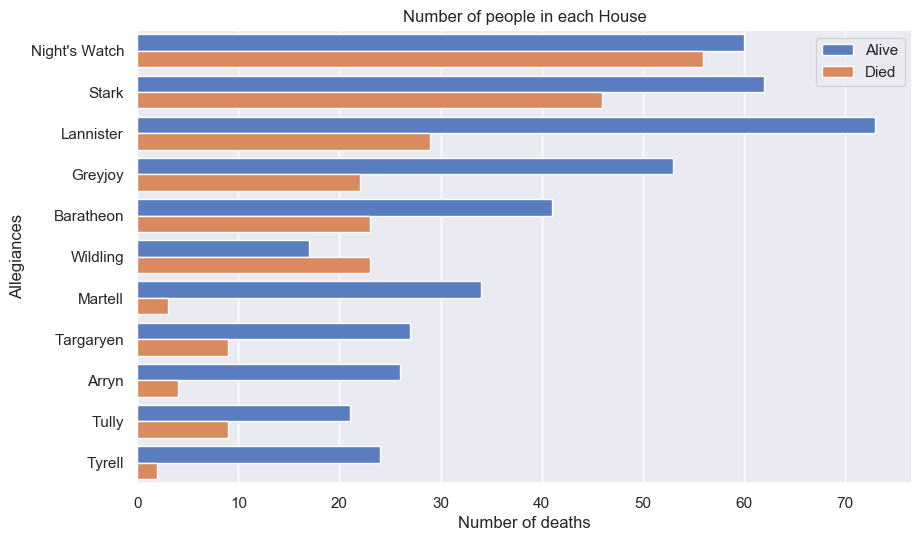

In [395]:
ax = sns.countplot(data = new_char_deaths[new_char_deaths.Allegiances != "None"], y = "Allegiances", 
                   hue = "died", dodge=True, 
                   order = new_char_deaths[new_char_deaths.Allegiances != "None"]["Allegiances"]
                           .value_counts(ascending=False).index )

ax.set(xlabel = "Number of deaths", title = "Number of people in each House")
plt.legend(title = "", labels = ["Alive", "Died"])
plt.show()